This dataset was processed as an exercise for the pycon 2018 class taught by Kevin Markham:
  - Youtube: https://www.youtube.com/watch?v=0hsKLYfyQZc&t=1175s
  - Dataset: https://openpolicing.stanford.edu/data/

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

In [254]:
ri = pd.read_csv('data/stanford_open_policing_dataset/ri_statewide_2020_04_01.csv')
ri.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


Let's check the mixed types warning and make sure we're getting the data correctly. The three columns specified are:
department_id
frisk_performed
raw_SearchResultThree
We're using neither of these three columns, so we will ignore this warning for now.
Always make sure you understand these warnings, though, as they could cause issues later
if you ignore them completely.

In [255]:
ri.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: o

In [256]:
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

## 1. Dropping columns that have more than 20% null values

Let's see which columns will be dropped.

In [257]:
threshold = 0.8 * ri.shape[0]
num_nulls = ri.isnull().sum()
print(f'type(num_nulls): {type(num_nulls)}')

type(num_nulls): <class 'pandas.core.series.Series'>


In [258]:
num_nulls[num_nulls.values > threshold].index.values

array(['contraband_found', 'contraband_drugs', 'contraband_weapons',
       'contraband_alcohol', 'contraband_other', 'search_basis',
       'reason_for_search', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'], dtype=object)

In [302]:
def get_shorter_df(df):
    return df.dropna(axis='columns', thresh=threshold).copy()

In [303]:
ri_short = get_shorter_df(ri)
ri_short

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,M,M
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,M,M
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,F,M
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,M,M
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,F,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,509677,2015-08-04,10:40:00,X3,white,male,500,vehicular,False,True,False,citation,False,False,Equipment/Inspection Violation,EQ,W,M,M
509677,509678,2015-12-20,11:17:00,K3,white,female,300,vehicular,False,True,False,citation,False,False,Speeding,SP,W,F,M
509678,509679,2015-11-09,23:35:00,X4,white,male,300,vehicular,False,False,True,warning,False,False,Equipment/Inspection Violation,EQ,W,M,W
509679,509680,2015-10-30,11:09:00,X4,white,female,500,vehicular,False,True,False,citation,False,False,Speeding,SP,W,F,M


## 2. Do men or women speed more often?

To do this, we can:
  - filter using reason_for_stop == Speeding and citation_issued == True
  - do a groupby of the subject_sex column
  - sum up the number of each type of driver (male/female)

In [260]:
ri_short.groupby('subject_sex').reason_for_stop.value_counts(normalize=True)

subject_sex  reason_for_stop                 
female       Speeding                            0.657308
             Other Traffic Violation             0.136581
             Equipment/Inspection Violation      0.107055
             Registration Violation              0.043077
             Seatbelt Violation                  0.027071
             Call for Service                    0.018057
             Special Detail/Directed Patrol      0.005071
             Motorist Assist/Courtesy            0.002532
             Violation of City/Town Ordinance    0.001647
             APB                                 0.000831
             Suspicious Person                   0.000564
             Warrant                             0.000206
male         Speeding                            0.522364
             Other Traffic Violation             0.206948
             Equipment/Inspection Violation      0.135102
             Registration Violation              0.040581
             Special Detai

Problem here is we don't know how many miles women drove vs men. We cannot conclude if men or women are safer drivers from this data alone.

## 3. Does gender affect who gets searched during a stop?

In [261]:
ri_short.groupby('subject_sex').search_conducted.value_counts(normalize=True)

subject_sex  search_conducted
female       False               0.981249
             True                0.018751
male         False               0.956208
             True                0.043792
Name: search_conducted, dtype: float64

We can also do this using the following code. This is because, the mean is an average of the True=1 and False=0, so it gives you the same number for boolean columns as above. This is bad in the sense that it is not explicit, so a reader of your code may not understand what is going on - avoid it.

In [262]:
ri_short.groupby('subject_sex').search_conducted.mean()

subject_sex
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64

All we've looked at is gender. We don't know why someone was stopped. If you interview police officers, maybe they will tell you that registration violations require a search. And women may have less registration violations than men. So registration violations is a confounding variable. Let's see if this is related to the type of violation.

In [263]:
ri_short.groupby(['reason_for_stop', 'subject_sex']) \
    .search_conducted.mean() \
    .unstack()                   # Unstack allows us to move the male/female index 
                                 # into columns. This makes it easier to read the table.

subject_sex,female,male
reason_for_stop,,
APB,0.165138,0.255319
Call for Service,0.042230,0.092419
Equipment/Inspection Violation,0.040245,0.070916
Motorist Assist/Courtesy,0.033133,0.089802
Other Traffic Violation,0.038021,0.059156
Registration Violation,0.054700,0.103589
Seatbelt Violation,0.017746,0.031705
Special Detail/Directed Patrol,0.018045,0.010249
Speeding,0.007738,0.026630


You can see that men are searched more often than women for all reasons for stops. This is just a data point, but does not say that because they're male, they're searched. It is tough to say any relationship is causal, so we will not go there. 

## 4. Why is search_type missing so often?

Why is reason_for_search missing so many times? 
Maybe because search was not conducted that many times. Let's check.

In [264]:
ri_short.search_conducted.value_counts()

False    491919
True      17762
Name: search_conducted, dtype: int64

This is the same as the number of nulls in the reason_for_search column.

## 5. During a search, how often is the driver frisked?

In [265]:
ri_short[ri_short.search_conducted == True].frisk_performed.value_counts(normalize=True)

True     0.524828
False    0.475172
Name: frisk_performed, dtype: float64

You can also do this using the mean() function

In [266]:
ri_short[ri_short.search_conducted == True].frisk_performed.mean()

0.5248282851030289

In [267]:
'During a search, the driver is frisked {:4.2f}% of the time' \
    .format(ri_short[ri_short.search_conducted == True].frisk_performed.mean() * 100.)

'During a search, the driver is frisked 52.48% of the time'

## 6. Which year had the least number of stops?

In [268]:
ri_non_null_dates = ri_short.dropna(axis=0, how='any', subset=['date']).copy()
years = ri_non_null_dates \
            .date\
            .str \
            .extract(r'(\d*)\-\d*\-\d*') \
            .astype('int')
ri_non_null_dates.insert(loc=1, column='year', value=years)
ri_non_null_dates.head()

,raw_row_number,year,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop
0,1,2005,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,M,M
1,2,2005,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,M,M
2,3,2005,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,F,M
3,4,2005,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,M,M
4,5,2005,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,SP,W,F,M


In [269]:
ri_non_null_dates.groupby('year').year.value_counts()

year  year
2005  2005    14079
2006  2006    58343
2007  2007    53203
2008  2008    49019
2009  2009    43453
2010  2010    42391
2011  2011    45794
2012  2012    60828
2013  2013    44686
2014  2014    50810
2015  2015    47065
Name: year, dtype: int64

The year 2005 had the least number of stops.

An easier way of doing this:

In [270]:
ri_short.dropna(axis=0, how='any', subset=['date']) \
    .date \
    .str \
    .slice(0, 4) \
    .value_counts(ascending=True)

2005    14079
2010    42391
2009    43453
2013    44686
2011    45794
2015    47065
2008    49019
2014    50810
2007    53203
2006    58343
2012    60828
Name: date, dtype: int64

Another easy way

In [271]:
combined = ri_short.date.str.cat(ri_short.time, sep = ' ')
ri_short['stop_datetime'] = pd.to_datetime(combined) # You can just use pd.to_datetime(ri.date) here
ri_short.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005.0

In [272]:
pd.to_datetime(ri_short.date)

0        2005-11-22
1        2005-10-01
2        2005-10-01
3        2005-10-01
4        2005-10-01
            ...    
509676   2015-08-04
509677   2015-12-20
509678   2015-11-09
509679   2015-10-30
509680          NaT
Name: date, Length: 509681, dtype: datetime64[ns]

## 7. How does drug activity change by time of day?

We're missing contraband_drugs column, since we took it out due to too few values.
Let's add it back in.

In [275]:
ri_short['contraband_drugs'] = ri['contraband_drugs'].copy()

In [278]:
ri_short.contraband_drugs.isnull().sum()

493693

In [279]:
ri_short.shape

(509681, 21)

In [280]:
ri_short = ri_short.dropna(axis=0, subset=['contraband_drugs'])

In [281]:
ri_short.shape

(15988, 21)

In [284]:
ri_short['contraband_drugs_int'] = ri_short['contraband_drugs'].astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Not sure why I'm getting this warning. I have already copied the contraband_drugs column from ri into ri_short. I've also copied when creating ri_short from ri.

In [289]:
ri_short.loc[:, 'contraband_drugs_int'] = ri_short.loc[:, 'contraband_drugs'].astype(int)

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


I've seen when searching the web that sometimes this happens when it is not really a problem. I'm not sure what to do here. Let's ignore it for now.

In [291]:
ri_short.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,frisk_performed,search_conducted,reason_for_stop,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,stop_datetime,contraband_drugs,contraband_drugs_int
297,298,2005-12-06,16:29:00,K2,black,male,900,vehicular,False,True,...,True,True,Registration Violation,RV,B,M,M,2005-12-06 16:29:00,False,0
304,305,2005-12-01,20:00:00,K3,black,male,300,vehicular,False,True,...,True,True,Other Traffic Violation,OT,B,M,M,2005-12-01 20:00:00,False,0
305,306,2005-12-01,20:25:00,K3,black,male,300,vehicular,False,True,...,False,True,Registration Violation,RV,B,M,M,2005-12-01 20:25:00,False,0
306,307,2005-12-01,21:05:00,K3,black,female,300,vehicular,False,True,...,False,True,Registration Violation,RV,B,F,M,2005-12-01 21:05:00,False,0
316,317,2005-12-07,02:38:00,K3,white,male,300,vehicular,True,False,...,True,True,Speeding,SP,W,M,P,2005-12-07 02:38:00,False,0


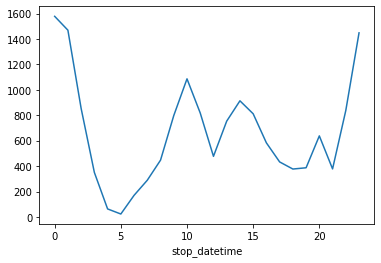

In [300]:
ri_short.groupby(ri_short.stop_datetime.dt.hour) \
    .contraband_drugs_int.count().plot();

## 8. Do most stops occur at night?

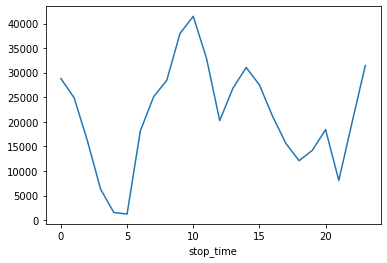

In [308]:
ri_short = get_shorter_df(ri) # Redo this since we removed lots of nulls in 7. above
ri_short['stop_time'] = pd.to_datetime(ri_short.time)
ri_short.groupby(ri_short.stop_time.dt.hour) \
    .type.count().plot();

The largest number of stops occur during the day (around 10am). There are a large number of stops that do occur at night in comparison. Consider that the number of motorists travelling during the day are much more than those at night. So the percentage of motorists stopped at night must be a larger percent compared to those stopped during the day. This we will not know until we see the data of how many motorists are travelling during the day/night.

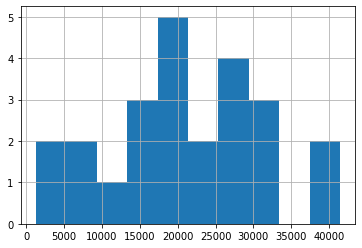

In [310]:
ri_short.groupby(ri_short.stop_time.dt.hour) \
    .type.count().hist();

In [311]:
ri_short.groupby(ri_short.stop_time.dt.hour) \
    .type.count()

stop_time
0.0     28807
1.0     24893
2.0     16166
3.0      6299
4.0      1567
5.0      1264
6.0     18150
7.0     25074
8.0     28459
9.0     37986
10.0    41463
11.0    32949
12.0    20261
13.0    26847
14.0    31062
15.0    27521
16.0    21112
17.0    15621
18.0    12108
19.0    14217
20.0    18425
21.0     8085
22.0    19870
23.0    31465
Name: type, dtype: int64